In [61]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


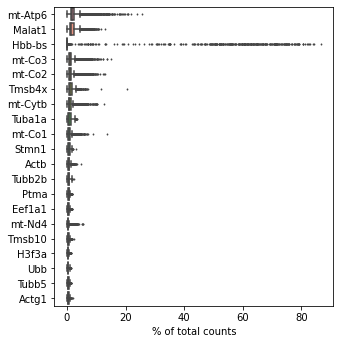

In [46]:
#look at highest expressed genes
sc.pl.highest_expr_genes(adata,n_top=20,)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


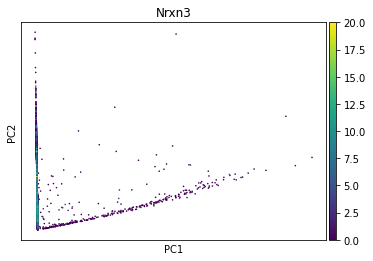

In [62]:
#produce PCA before filtering
#create PCA
sc.tl.pca(adata, svd_solver='arpack')
#visualize PCA
sc.pl.pca(adata, color = "Nrxn3")

In [63]:
#filter low expressed genes
#at least 1 count in 5 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

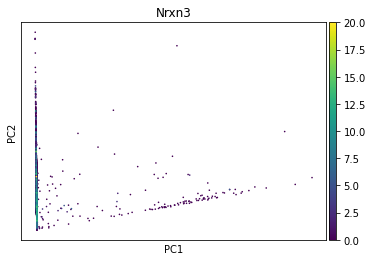

In [64]:
#recreate PCA of filtered counts
#produce PCA before filtering
#create PCA
sc.tl.pca(adata, svd_solver='arpack')
#visualize PCA
sc.pl.pca(adata, color = "Nrxn3")

In [65]:
#total and logarithmize the data in order to be able to compare expression profiles of cells to each other
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)

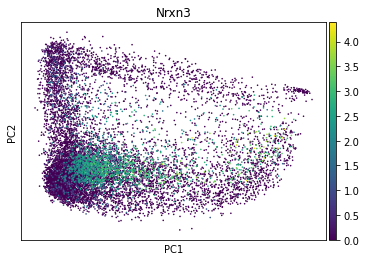

In [66]:
#recreate PCA after normalizing the data
sc.tl.pca(adata, svd_solver='arpack')
#visualize PCA
sc.pl.pca(adata, color = "Nrxn3")

In [67]:
#compute neighborhood values for leiden clustering
sc.pp.neighbors(adata, n_neighbors=10)

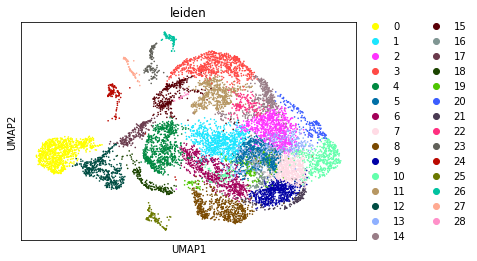

In [68]:
#compute UMAP
sc.tl.umap(adata)
#plot UMAP with leiden clustering
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

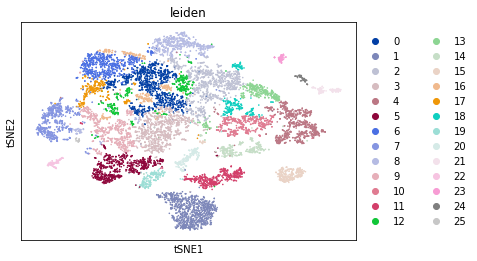

In [55]:
#compute tsne
sc.tl.tsne(adata)
#plot UMAP with leiden clustering
sc.tl.leiden(adata)
sc.pl.tsne(adata, color=['leiden'])

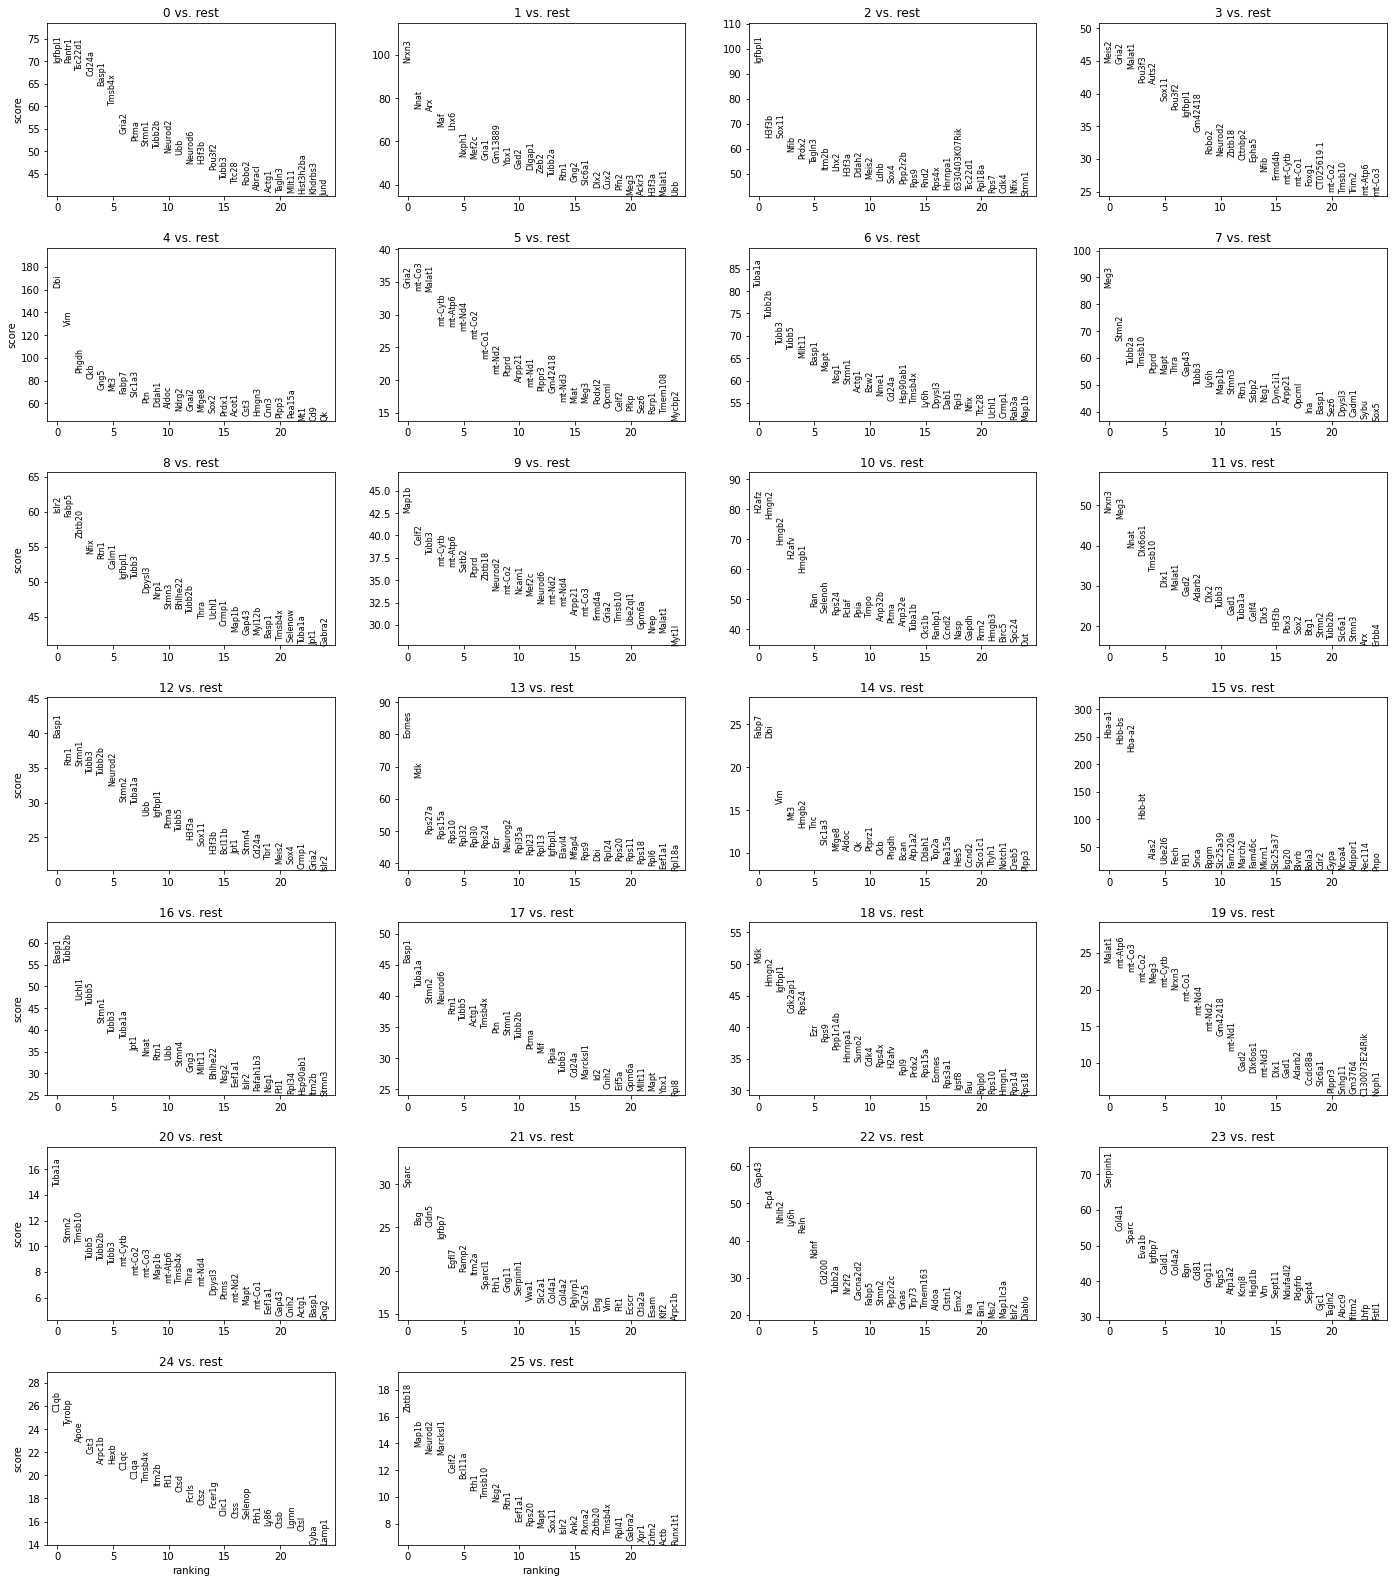

In [58]:
#identify and plot marker genes for each cluster using t-test
sc.tl.rank_genes_groups(adata,'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes = 25, sharey=False)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


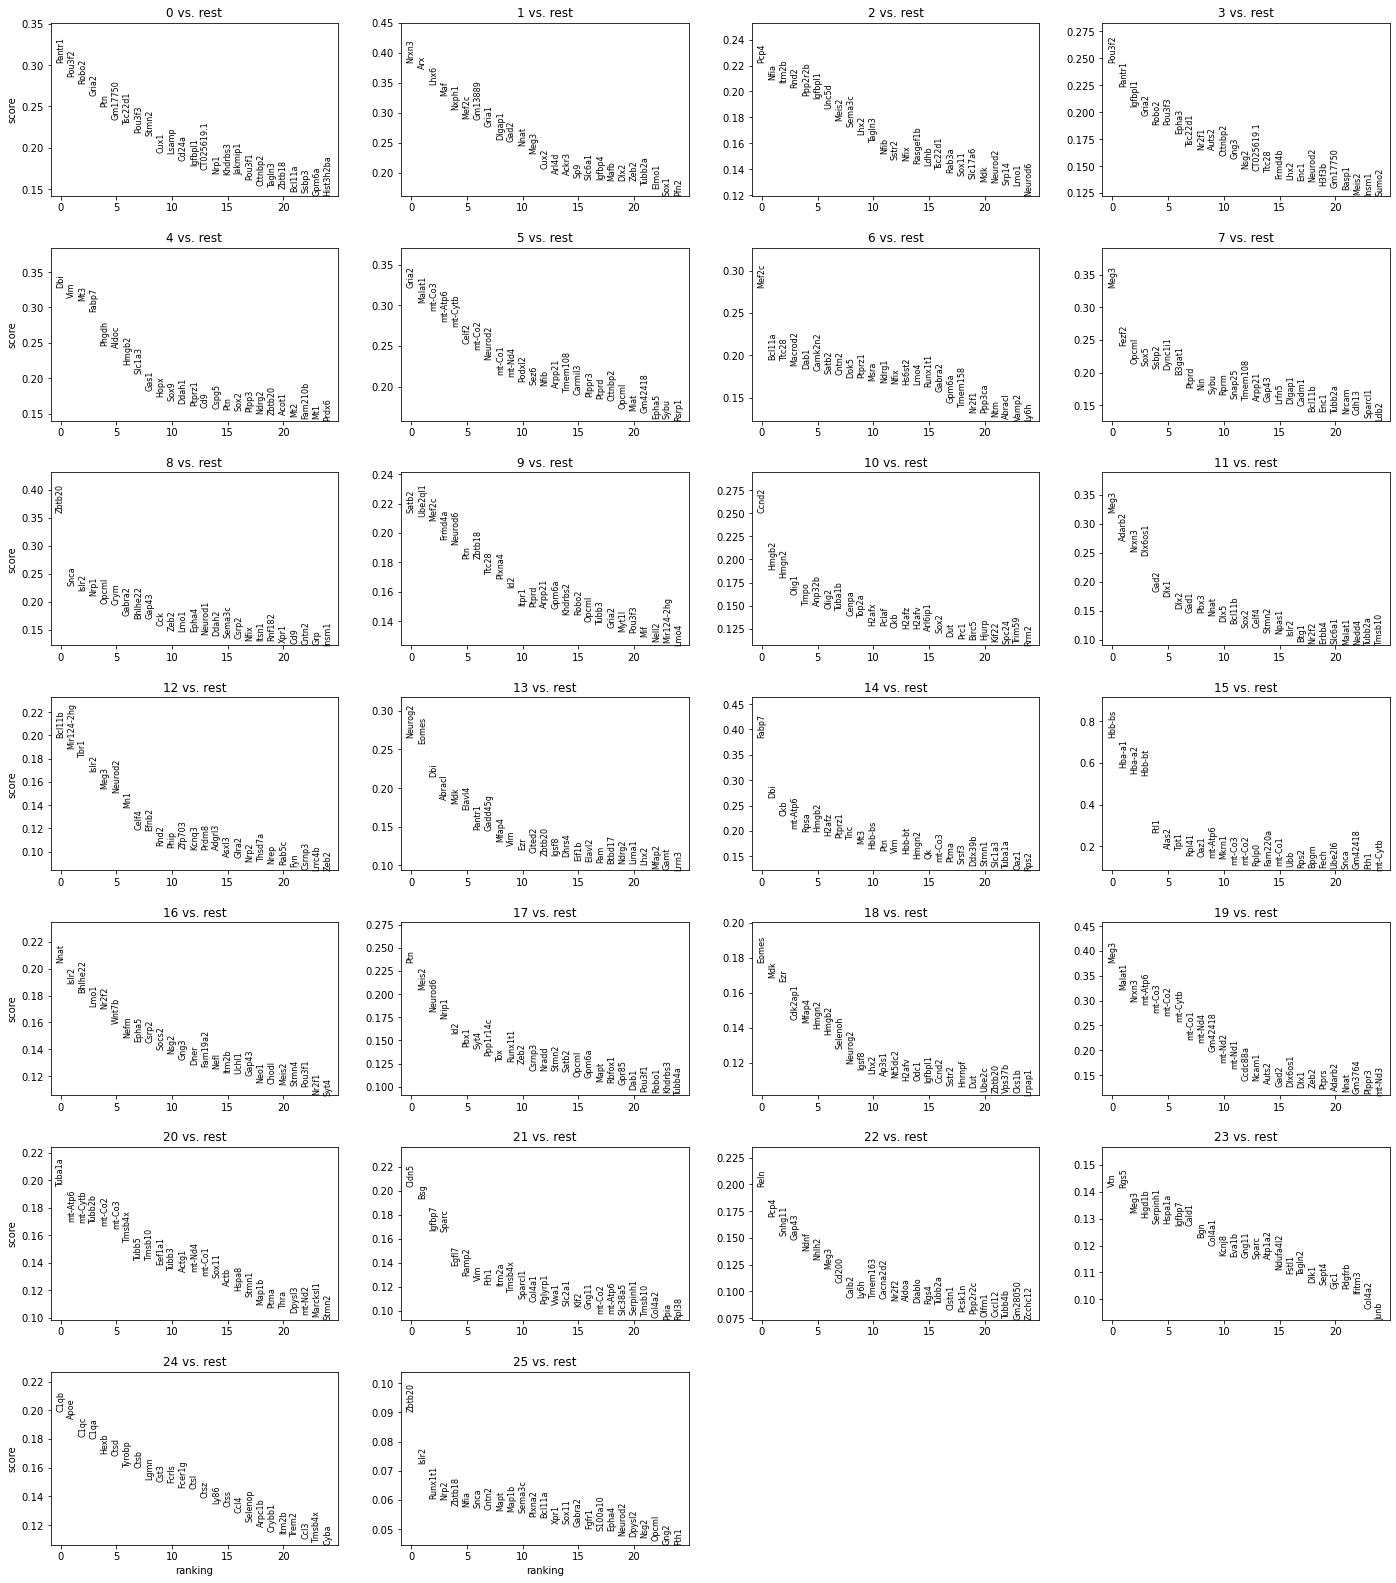

In [59]:
#repeat with logistic regression
#identify and plot marker genes for each cluster using log regression
sc.tl.rank_genes_groups(adata,'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes = 25, sharey=False)

In [237]:
#Use literature to identify cell tpyes by marker genes 
#dictionary holding cell types
marker_genes_dict = {
    'Chrondrocyte': ['Maf'],
    'Neuroblasts': ['Tubb3'],
    'Interneurons': ['Cdh4','Nxph4','Nrn1'],
    'Microglia': ['Itgam'],
    'Neural Stem Cell': ["Sox1",'Prom1','Sp8','Gfap'],
    'Neuroblasts': ['Ntng1','Tshz1','Sp9','Sp8','Prok2','Dll3'],
    'Neuroendocrine Cells': ['Cck','Serpini1'],
    'Oligodendrocyte Progenitor Cells': ['Cspg4','Pdgfra','Olig2'],
    'Pyramidal Cells': ['Pcp4','Synpr','Nr4a2']
}
#MAF: Chond: cluster 0 (better than 1)
#LHX2: tanycytes, cluster 2
#Glutaminergic Neuron: cluster 3
#Muller cells: cluster 4
#Neuroblasts: cluster 6
#Neurons: cluster 7
#enteric neurons: cluter 9
#interneurons: cluster 12
#elmo1 interneurons 
#cluster 17 has ptn for tanycyte
###
#Meningeal Cells: Nnat cluster 16

categories: 0, 1, 2, etc.
var_group_labels: Chrondrocyte, Neuroblasts, Interneurons, etc.


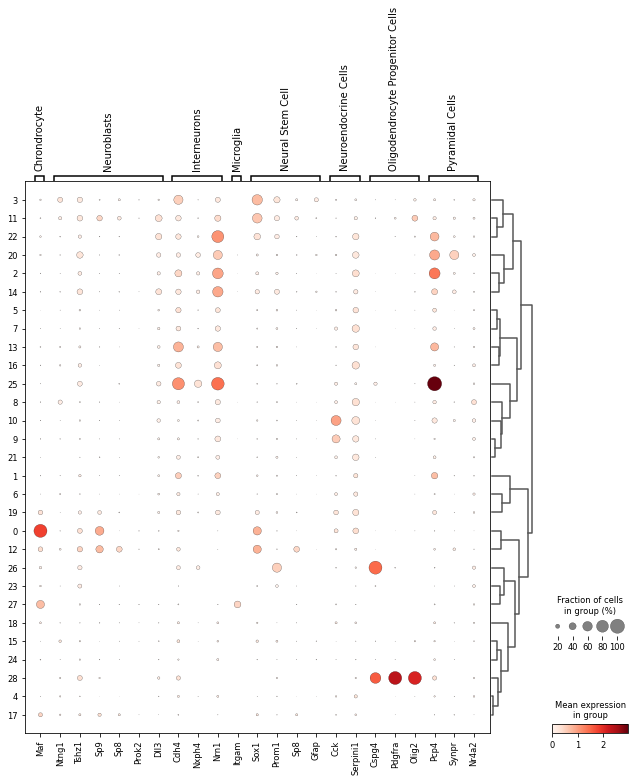

In [238]:
#dotplot for marker genes per cluster
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', dendrogram=True)

In [241]:
#dictionary for map clusters and labels
cluster2annotation = {
     '20': 'Pyramidal Cells',
     '28': 'Oligodendrocyte Progenitor Cells',
     '10': 'Neuroendocrine Cells',
     '3': 'Neural Stem Cells',
     '27': 'Microglia',
     '25': 'Interneurons',
     '12': 'Neuroblasts',
     '0': 'Chondrocytes',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['cell type'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

categories: Chondrocytes, Interneurons, Microglia, etc.
var_group_labels: Chrondrocyte, Neuroblasts, Interneurons, etc.


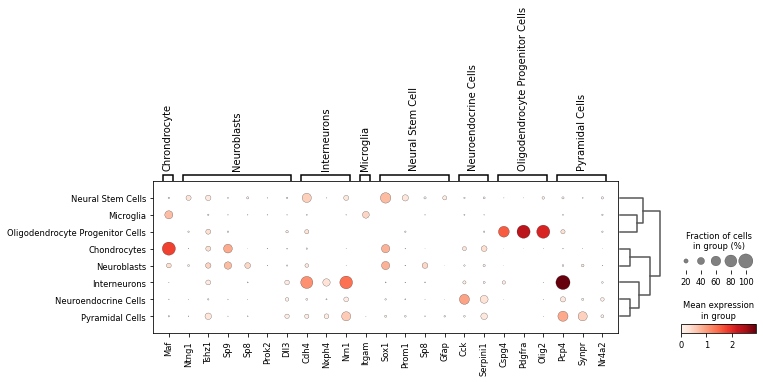

In [242]:
sc.pl.dotplot(adata, marker_genes_dict, 'cell type', dendrogram=True)

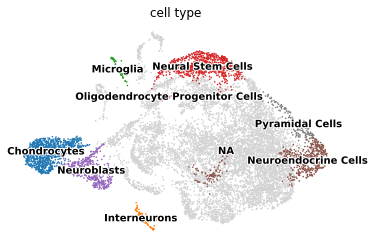

In [243]:
sc.pl.umap(adata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)